# Detección, Clasificación y Seguimiento de Actores Viales

En este notebook, nos embarcaremos en la tarea de detectar, clasificar y seguir actores viales, como peatones, bicicletas, motos, carros, buses y camiones. Para lograrlo, utilizaremos el modelo YOLOv8, una versión avanzada y optimizada de la conocida arquitectura YOLO para la detección de objetos en tiempo real.

El proceso se llevará a cabo en varias etapas:
1. Elección y justificación del modelo utilizado.
2. Preparación y exploración de los vídeos proporcionados.
3. Implementación y descripción detallada del modelo.
4. Pruebas del modelo y visualización de los resultados.

In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import os
from ultralytics import YOLO
from PIL import Image
import torch

### 1.Análisis exploratorio de los datos

In [3]:
# Ruta al video
video_path = './data/videos/C6.avi'

# Leer el video
cap = cv2.VideoCapture(video_path)

# Obtener propiedades básicas
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = total_frames / fps
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"FPS: {fps}")
print(f"Total frames: {total_frames}")
print(f"Duration (seconds): {duration}")
print(f"Resolution: {width}x{height}")

FPS: 10.0
Total frames: 600
Duration (seconds): 60.0
Resolution: 1280x720


In [4]:
def show_random_frames(video_path, rows=3, cols=3):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 3*rows))
    
    for i in range(rows):
        for j in range(cols):
            random_frame = random.randint(0, total_frames-1)
            cap.set(cv2.CAP_PROP_POS_FRAMES, random_frame)
            ret, frame = cap.read()
            axs[i, j].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            axs[i, j].axis('off')
            axs[i, j].set_title(f"Frame {random_frame}")
    
    plt.tight_layout()
    plt.show()

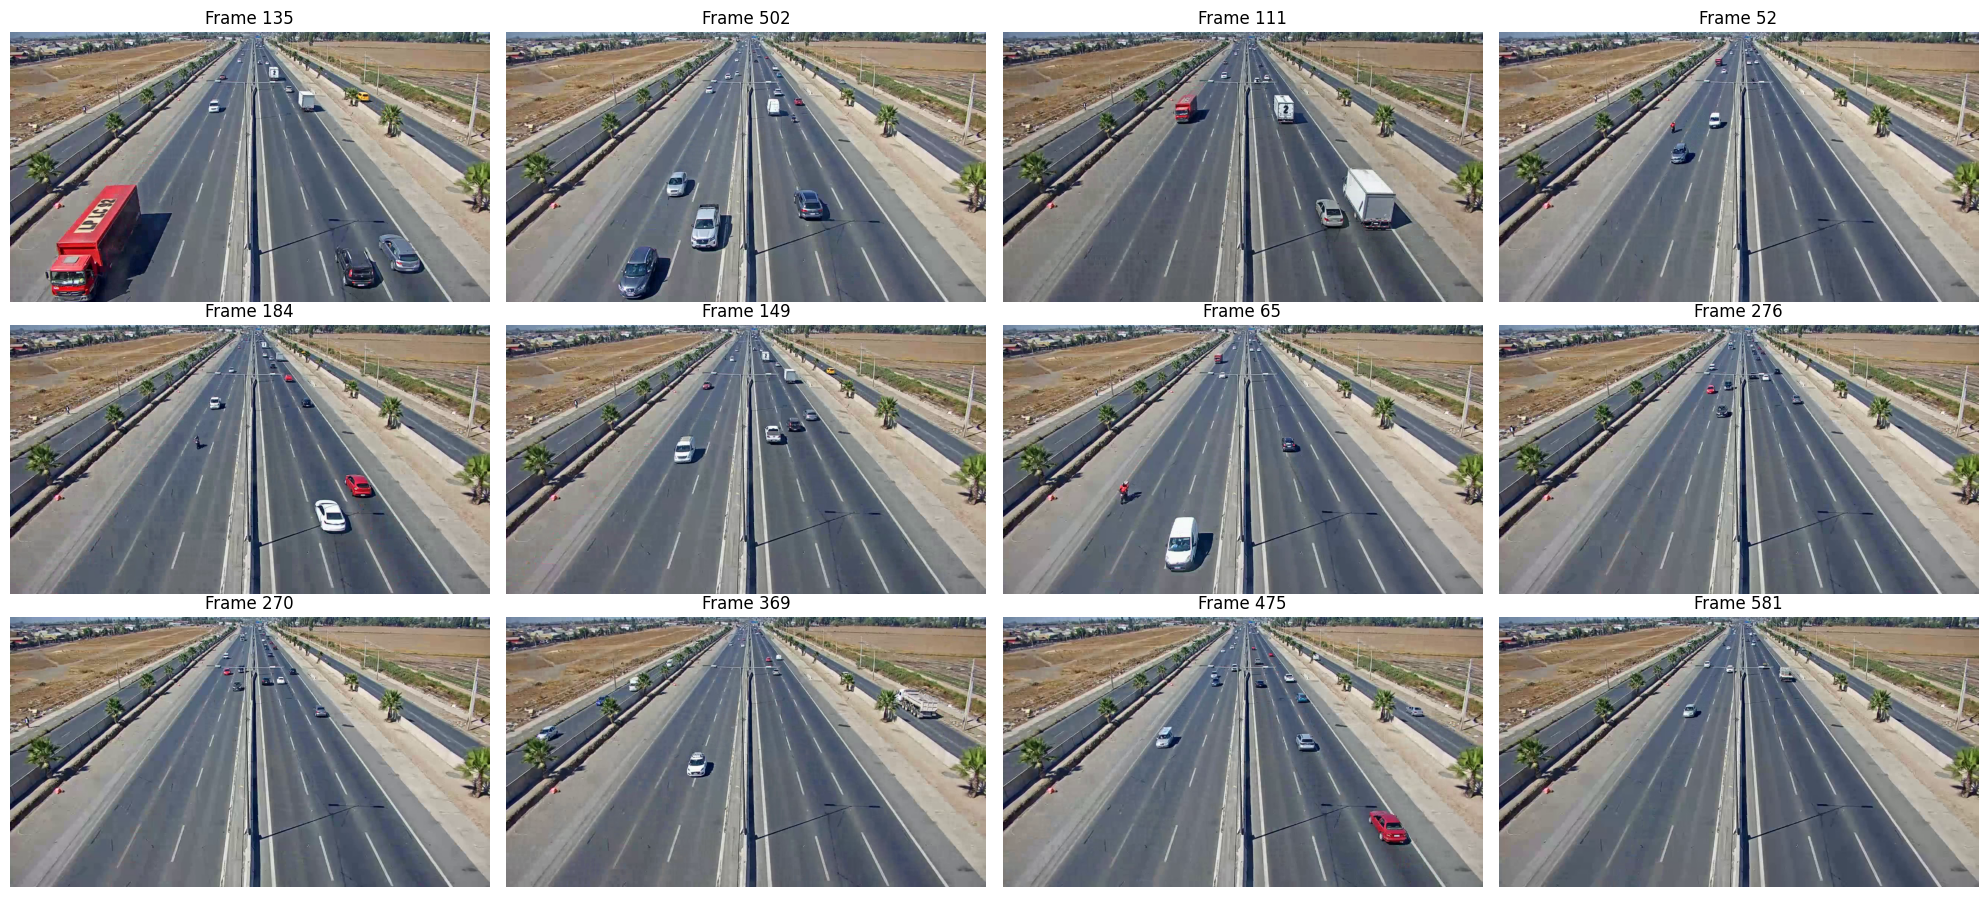

In [5]:
show_random_frames(video_path, rows=3, cols=4)

In [6]:
def extract_frames(video_path, output_folder, fps=1):
    # Asegurarse de que la carpeta de salida exista
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    cap = cv2.VideoCapture(video_path)
    video_fps = int(cap.get(cv2.CAP_PROP_FPS))
    video_name = os.path.basename(video_path).split('.')[0]  # Tomar el nombre del video sin la extensión

    frame_no = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_no % video_fps == 0:  # Si es un frame que queremos guardar (cada "video_fps" frames)
            output_path = os.path.join(output_folder, f"{video_name}_frame{frame_no}.jpg")
            cv2.imwrite(output_path, frame)
        frame_no += 1

    cap.release()

In [7]:
# Carpeta donde guardarás los frames
output_folder = "./data/frames_extracted"

# Ruta donde tienes tus videos
videos_folder = "./data/videos"

# Recorrer cada video y extraer frames
for video_file in os.listdir(videos_folder):
    if video_file.endswith(".avi"):
        video_path = os.path.join(videos_folder, video_file)
        extract_frames(video_path, output_folder)

In [22]:
# Cargar un modelo preentrenado
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:07<00:00, 3.02MB/s]


In [23]:
results = model.train(data='./my_dataset.yaml', epochs=100, imgsz=640)

New https://pypi.org/project/ultralytics/8.0.172 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.171 🚀 Python-3.8.10 torch-2.0.1+cu117 CPU (AMD Ryzen 7 5700U with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./my_dataset.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=F

In [24]:
run_test = model(source="./data/videos/C6.avi", show=True, conf=0.4)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/600) /home/juanpb27/Inteia/object_detection/data/videos/C6.avi: 384x640 7 cars, 547.1ms
video 1/1 (2/600) /home/juanpb27/Inteia/object_detection/data/videos/C6.avi: 384x640 7 cars, 222.4ms
video 1/1 (3/600) /home/juanpb27/Inteia/object_detection/data/videos/C6.avi: 384x640 7 cars, 175.1ms
video 1/1 (4/600) /home/juanpb27/Inteia/object_detection/data/videos/C6.avi: 384x640 7 cars, 177.7ms
video 1/1 (5/600) /home/juanpb27/Inteia/object_detec

In [60]:
def show_random_detections(model, image_folder, n=5):
    """
    Muestra las detecciones en n imágenes aleatorias del directorio especificado.

    Args:
    - model (YOLO): modelo YOLO cargado.
    - image_folder (str): ruta al directorio que contiene las imágenes.
    - n (int): número de imágenes aleatorias para mostrar. Por defecto es 5.
    """
    # Obtener todos los archivos de imagen en el directorio
    image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]
    # Seleccionar n imágenes aleatoriamente
    selected_images = random.sample(image_files, n)
    # Definir el número de filas basado en el número de imágenes
    n_rows = int(np.ceil(n / 2))

    # Crear un grid de 2 columnas para mostrar las imágenes
    fig, axs = plt.subplots(n_rows, 2, figsize=(10, 3*n_rows))

    for idx, img_file in enumerate(selected_images):
        image_path = os.path.join(image_folder, img_file)

        image = cv2.imread(image_path)
        results = model([image])

        for r in results:
            im_array = r.plot()

            # Obtener la ubicación actual en el grid para mostrar la imagen
            row, col = divmod(idx, 2)

            axs[row][col].imshow(cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB))
            axs[row][col].axis('off')
            axs[row][col].set_title(img_file)

    plt.tight_layout()
    plt.show()


0: 384x640 13 cars, 183.9ms
Speed: 1.6ms preprocess, 183.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 truck, 4 cars, 143.9ms
Speed: 3.1ms preprocess, 143.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 truck, 9 cars, 138.2ms
Speed: 2.1ms preprocess, 138.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 2 cars, 144.8ms
Speed: 2.7ms preprocess, 144.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 167.5ms
Speed: 2.2ms preprocess, 167.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 truck, 1 car, 1 bicycle, 122.5ms
Speed: 2.3ms preprocess, 122.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 trucks, 5 cars, 139.4ms
Speed: 2.2ms preprocess, 139.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 cars, 166.3ms
Speed: 2.5ms preprocess, 166.3ms

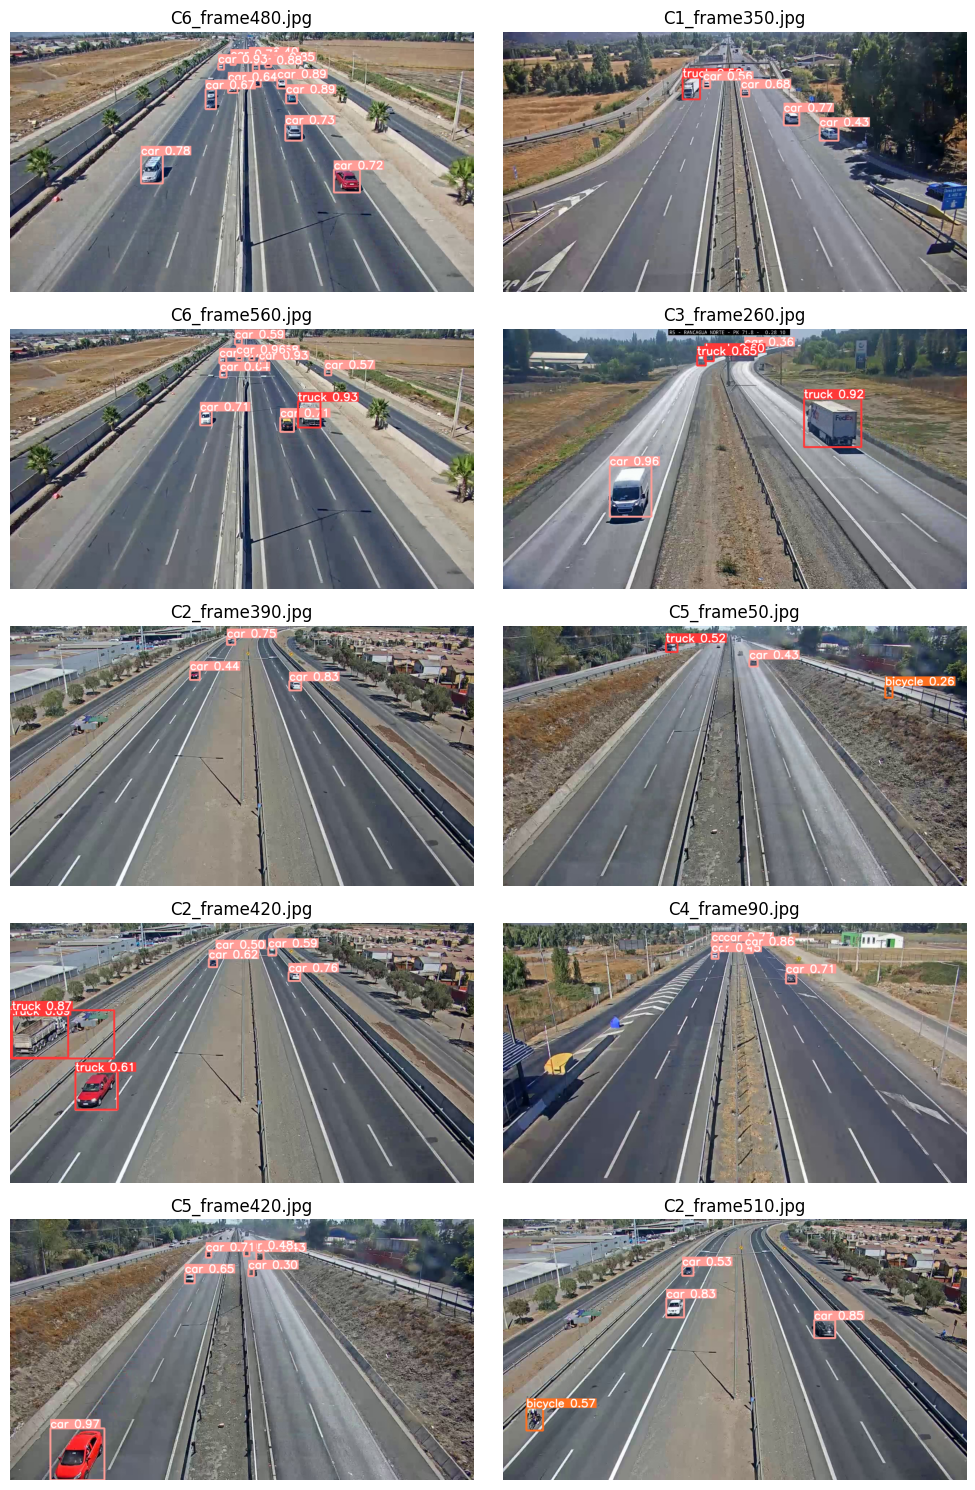

In [61]:
image_folder = './data/frames_extracted'
show_random_detections(model, image_folder, n=10)